<hr>
<h1 style="text-align: center;">Vortex Panel Method</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 4</h3>
<h3 style="text-align: center;">Date: 11/22/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [1]:
#standard imports and setups
import pandas as pd #type: ignore
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
import matplotlib.lines as mlines
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

## Problem 1: Vortex Potential Flow

This problem asks us to plot a single vortex, 12 vorticies (finite vortex sheet), and an infinite vortex sheet (or, rather, an approximation of one). 

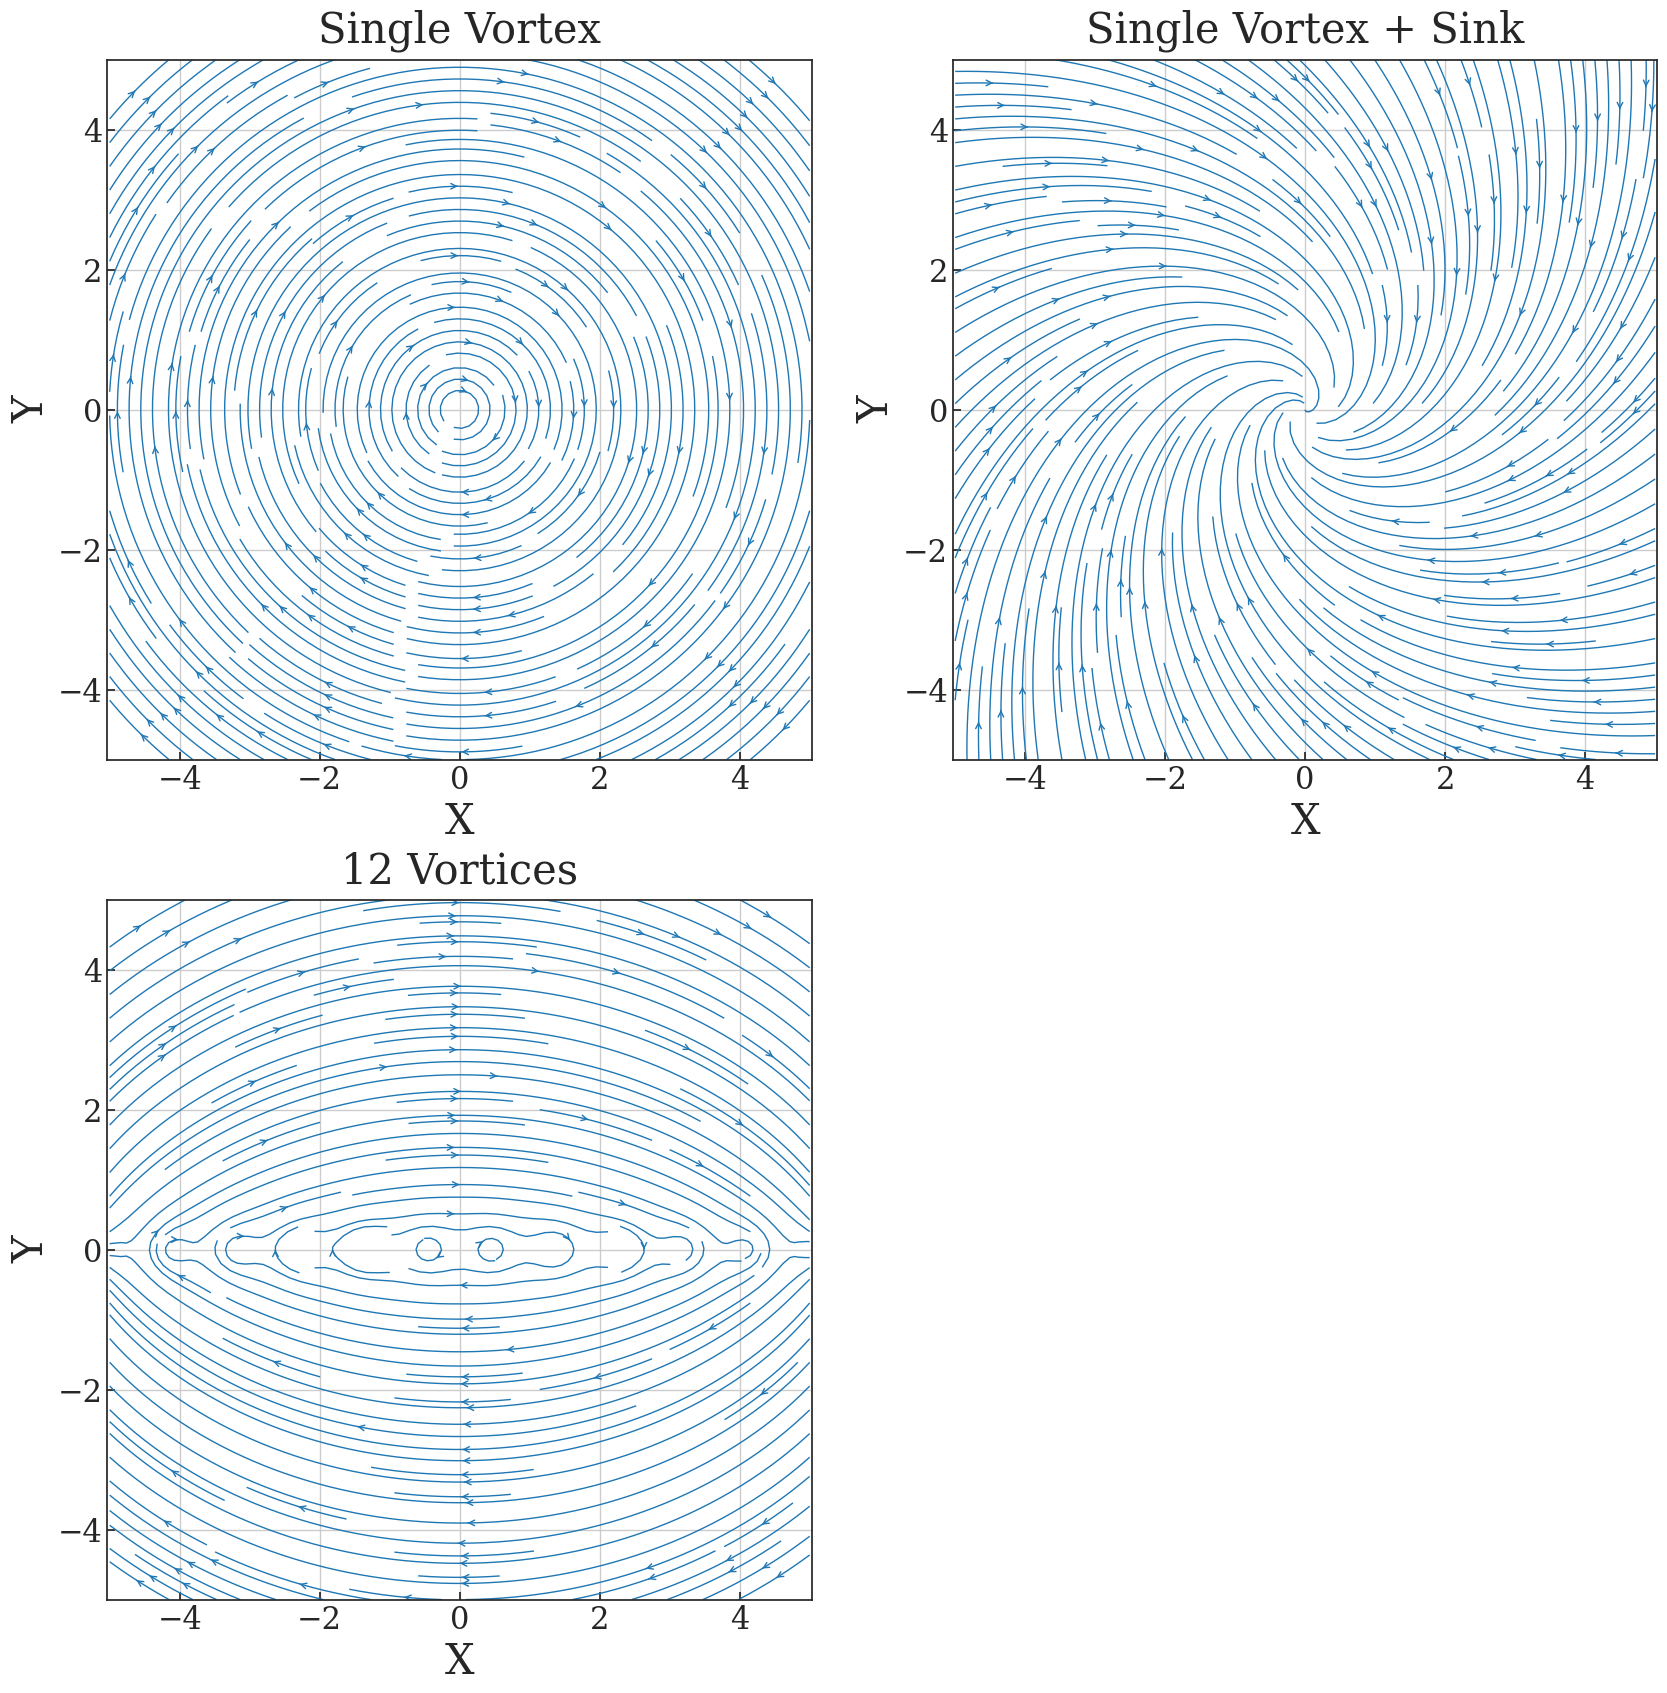

In [35]:
#set up functions and meshgrid

N = 250                                         # Number of points/sections to use in each direction for our flow
x_start, x_end = -5.0, 5.0                      # Boundaries of our flow in the x direction 
y_start, y_end = -5.0, 5.0                      # Boundaries of our flow in the y direction 

# Note, you can adjust the start and end points later to get the best image of your plot / flow

x = np.linspace(x_start, x_end, N)              # 1D array of x points
y = np.linspace(y_start, y_end, N)              # 1D array of y points
X, Y = np.meshgrid(x, y) 

def get_vortex_velocity(Gamma, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex
    
    Parameters
    ----------
    Gamma: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_vortex from the equations above
    u = (Gamma/(2*np.pi))*((Y-yv)/((X-xv)**2 + (Y-yv)**2))

    # Here, input the equation for v_vortex from the equations above
    v = -1 * (Gamma/(2*np.pi)) * ((X-xv)/((X-xv)**2 + (Y-yv)**2))
    
    return u, v
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)

    # Here, input the equation for v_source from the equations above
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

vortStrength = 5
sstrength = -5

uVort, vVort = get_vortex_velocity(vortStrength,0,0,X,Y)
uSink, vSink = get_velocity(sstrength,0,0,X,Y)


plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title("Single Vortex")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, uVort, vVort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal")

plt.subplot(2,2,2)
plt.title("Single Vortex + Sink")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, uVort + uSink, vVort + vSink, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal")

sum_uVort = 0
sum_vVort = 0

nVortices = 12 #Number of vortices we want to plot
for xLoc in np.linspace(-5,5,nVortices):
    u, v = get_vortex_velocity(vortStrength,xLoc,0,X,Y)
    sum_uVort += u
    sum_vVort += v
plt.subplot(2,2,3)
plt.title("12 Vortices")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, sum_uVort, sum_vVort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal");